# Dependencies

In [2]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from math import log

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import load_iris

# Read the CSV and Preform Basic Data Cleaning

In [3]:
gender_df = pd.read_csv("data/gender_submission.csv")
test_df1 = pd.read_csv("data/test.csv")
train_df = pd.read_csv("data/train.csv")

# Edit datasets
test_df2 = pd.read_csv("data/test.csv")
train_df2 = pd.read_csv("data/train.csv")

In [4]:
df1 = test_df1.count()
df1 = pd.DataFrame(df1).reset_index().rename(columns={"index":"fields", 0:"fields_value_count"})
df1

,fields,fields_value_count
0,PassengerId,418
1,Pclass,418
2,Name,418
3,Sex,418
4,Age,332
5,SibSp,418
6,Parch,418
7,Ticket,418
8,Fare,417
9,Cabin,91


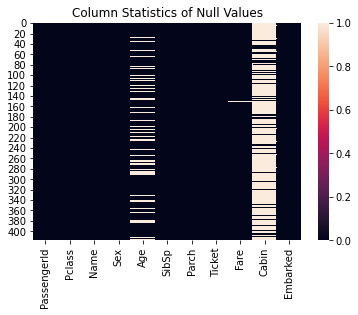

In [10]:
sns.heatmap(test_df1.isnull())
plt.title("Column Statistics of Null Values")
plt.savefig("resource/images/na_test_df_heatmap.png", bbox_inches='tight', pad_inches=0.5)

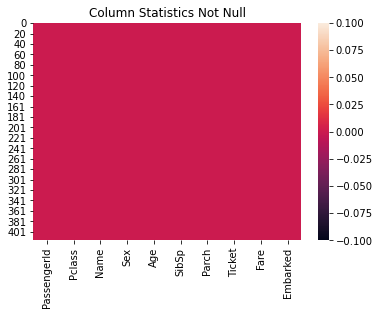

In [15]:
# 
test_df3 = test_df1.drop(['Cabin'], axis=1)

# Because Fare only account for one with Null, we filtering for all row not null. Easy peasy
test_df3 = test_df3[test_df3['Fare'].notna()]

# Replaced null Age value with random number between the youngest and oldest age
test_df3['Age'] = test_df3['Age'].apply(lambda x: x if pd.notnull(x) else np.random.randint(test_df3['Age'].min(), test_df3['Age'].max()))

# Save As test_df
test_df = test_df3

sns.heatmap(test_df3.isnull())
plt.title("Column Statistics Not Null", )
plt.savefig("resource/images/not_na_test_df_heatmap.png", bbox_inches='tight', pad_inches=0.5)

## New Age Table

In [14]:
test_df2 = test_df2.loc[test_df2['Age'].isnull()]
test_df2['New Age'] = test_df3['Age'].copy()
new_age = test_df2[['Name', 'Sex', 'Age', 'New Age']]
new_age

,Name,Sex,Age,New Age
10,"Ilieff, Mr. Ylio",male,NaN,8.0
22,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,22.0
29,"Samaan, Mr. Elias",male,NaN,16.0
33,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,19.0
36,"Roth, Miss. Sarah A",female,NaN,31.0
...,...,...,...,...
408,"Riordan, Miss. Johanna Hannah""""",female,NaN,16.0
410,"Naughton, Miss. Hannah",female,NaN,42.0
413,"Spector, Mr. Woolf",male,NaN,71.0
416,"Ware, Mr. Frederick",male,NaN,57.0
